# 아파트_실거래가

### 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
apt23 = pd.read_csv('data_yena/아파트(전월세)_실거래가_2023.csv', header=15, encoding='cp949')
apt24 = pd.read_csv('data_yena/아파트(전월세)_실거래가_2024.csv', header=15, encoding='cp949')

In [3]:
apt23_deal = pd.read_csv('data_yena/아파트(매매)_실거래가_2023.csv', header=15, encoding='cp949')
apt24_deal = pd.read_csv('data_yena/아파트(매매)_실거래가_2024.csv', header=15, encoding='cp949')

### 전처리

In [4]:
apt23_df = apt23[apt23['전월세구분']=='전세']
apt24_df = apt24[apt24['전월세구분']=='전세']

In [5]:
apt23_df['월세금(만원)'] = apt23_df['월세금(만원)'].str.replace(',', '').astype(int)
apt24_df['월세금(만원)'] = apt24_df['월세금(만원)'].str.replace(',', '').astype(int)

C:\Users\emily\AppData\Local\Temp\ipykernel_20360\3222935364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt23_df['월세금(만원)'] = apt23_df['월세금(만원)'].str.replace(',', '').astype(int)
C:\Users\emily\AppData\Local\Temp\ipykernel_20360\3222935364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt24_df['월세금(만원)'] = apt24_df['월세금(만원)'].str.replace(',', '').astype(int)


In [6]:
apt23_df['보증금(만원)'] = apt23_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
apt23_df['보증금(만원)'] = pd.to_numeric(apt23_df['보증금(만원)']).astype(int)

C:\Users\emily\AppData\Local\Temp\ipykernel_20360\760281986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt23_df['보증금(만원)'] = apt23_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
C:\Users\emily\AppData\Local\Temp\ipykernel_20360\760281986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt23_df['보증금(만원)'] = pd.to_numeric(apt23_df['보증금(만원)']).astype(int)


In [7]:
apt24_df['보증금(만원)'] = apt24_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
apt24_df['보증금(만원)'] = pd.to_numeric(apt24_df['보증금(만원)']).astype(int)

C:\Users\emily\AppData\Local\Temp\ipykernel_20360\3453946786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt24_df['보증금(만원)'] = apt24_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
C:\Users\emily\AppData\Local\Temp\ipykernel_20360\3453946786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt24_df['보증금(만원)'] = pd.to_numeric(apt24_df['보증금(만원)']).astype(int)


In [8]:
apt23_deal['거래금액(만원)'] = apt23_deal['거래금액(만원)'].str.replace(',', '').astype(int)
apt24_deal['거래금액(만원)'] = apt24_deal['거래금액(만원)'].str.replace(',', '').astype(int)

In [9]:
apt23_df['계약년월'] = pd.to_datetime(apt23_df['계약년월'].astype(str), format='%Y%m')
apt24_df['계약년월'] = pd.to_datetime(apt24_df['계약년월'].astype(str), format='%Y%m')

C:\Users\emily\AppData\Local\Temp\ipykernel_20360\2180389127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt23_df['계약년월'] = pd.to_datetime(apt23_df['계약년월'].astype(str), format='%Y%m')
C:\Users\emily\AppData\Local\Temp\ipykernel_20360\2180389127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt24_df['계약년월'] = pd.to_datetime(apt24_df['계약년월'].astype(str), format='%Y%m')


In [10]:
apt23_deal['계약년월'] = pd.to_datetime(apt23_deal['계약년월'].astype(str), format='%Y%m')
apt24_deal['계약년월'] = pd.to_datetime(apt24_deal['계약년월'].astype(str), format='%Y%m')

In [35]:
apt23_df['계약구분'].value_counts()

신규    95827
갱신    44797
-     25235
Name: 계약구분, dtype: int64

In [36]:
apt24_df['계약구분'].value_counts()

신규    89813
갱신    45707
-      8349
Name: 계약구분, dtype: int64

In [41]:
apt23_df[apt23_df['계약구분']=='신규']['종전계약 보증금(만원)']

0         NaN
4         NaN
6         NaN
10        NaN
12        NaN
         ... 
283306    NaN
283318    NaN
283319    NaN
283323    NaN
283324    NaN
Name: 종전계약 보증금(만원), Length: 95827, dtype: object

In [37]:
apt23_df[apt23_df['계약구분']=='-']['종전계약 보증금(만원)']

5         NaN
9         NaN
16        NaN
19        NaN
29        NaN
         ... 
283303    NaN
283307    NaN
283317    NaN
283320    NaN
283322    NaN
Name: 종전계약 보증금(만원), Length: 25235, dtype: object

- 계약구분이 '-'인 경우 종전계약 보증금 내역이 없으므로 계약구분을 신규인 것으로 가정하고 분석 진행

In [42]:
apt23_df['계약구분'] = apt23_df['계약구분'].replace('-', '신규')
apt23_df['계약구분'].value_counts()

C:\Users\emily\AppData\Local\Temp\ipykernel_20360\365054085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt23_df['계약구분'] = apt23_df['계약구분'].replace('-', '신규')


신규    121062
갱신     44797
Name: 계약구분, dtype: int64

<Axes: ylabel='계약구분'>

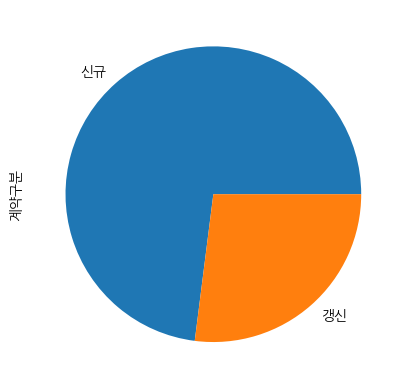

In [47]:
apt23_df['계약구분'].value_counts().plot(kind='pie')

In [43]:
apt24_df['계약구분'] = apt23_df['계약구분'].replace('-', '신규')
apt24_df['계약구분'].value_counts()

C:\Users\emily\AppData\Local\Temp\ipykernel_20360\1549378080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt24_df['계약구분'] = apt23_df['계약구분'].replace('-', '신규')


신규    62025
갱신    22713
Name: 계약구분, dtype: int64

<Axes: ylabel='계약구분'>

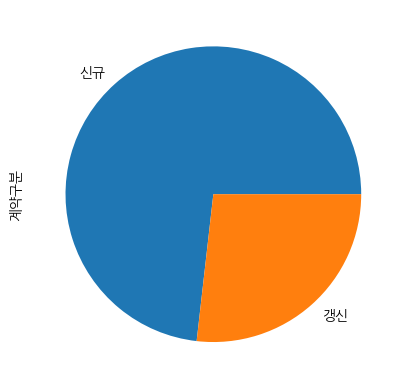

In [48]:
apt24_df['계약구분'].value_counts().plot(kind='pie')

In [51]:
apt23_df[apt23_df['계약구분']=='갱신']

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,월세금(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형
22,23,서울특별시 마포구 창전동,438,438,0,신촌금호,전세,59.210,2023-12-01,31,...,0,2,2001,서강로9길 19,202402~202602,갱신,-,"42,000",0,아파트
25,26,서울특별시 송파구 가락동,913,913,0,헬리오시티,전세,84.990,2023-12-01,31,...,0,2,2018,송파대로 345,202402~202602,갱신,-,"106,000",0,아파트
26,27,서울특별시 송파구 잠실동,35,35,0,트리지움,전세,149.450,2023-12-01,31,...,0,23,2007,잠실로 62,202408~202508,갱신,-,"100,000",0,아파트
27,28,서울특별시 송파구 잠실동,35,35,0,트리지움,전세,149.450,2023-12-01,31,...,0,23,2007,잠실로 62,202408~202508,갱신,-,"100,000",0,아파트
53,54,서울특별시 영등포구 대림동,1101-7,1101,7,G밸리소홈,전세,16.100,2023-12-01,31,...,0,7,2018,도림천로19길 11,202312~202412,갱신,-,"14,870",0,아파트
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283296,283297,서울특별시 노원구 공릉동,81,81,0,태강아파트(아이파크),전세,49.600,2023-01-01,1,...,0,9,1999,공릉로34길 62,202302~202502,갱신,사용,"23,000",0,아파트
283305,283306,서울특별시 강동구 상일동,521,521,0,고덕자이,전세,84.445,2023-01-01,1,...,0,19,2021,상일로 55,202303~202503,갱신,사용,"80,000",0,아파트
283309,283310,서울특별시 강남구 개포동,1280,1280,0,래미안블레스티지,전세,59.837,2023-01-01,1,...,0,13,2019,선릉로 8,202301~202505,갱신,-,"70,350",0,아파트
283315,283316,서울특별시 관악구 남현동,602-146,602,146,남현그린,전세,88.400,2023-01-01,1,...,0,3,2002,승방1길 66,202301~202412,갱신,사용,"50,000",0,아파트


### 보증금

In [12]:
apt23_df['보증금(만원)'].describe()

count     165859.000000
mean       53585.225227
std        34052.671913
min            3.000000
25%        33000.000000
50%        47000.000000
75%        65000.000000
max      1000000.000000
Name: 보증금(만원), dtype: float64

In [ ]:
# 이상치로 판단하여 제거
apt23_df[apt23_df['보증금(만원)']==3]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,월세금(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형
69515,69516,서울특별시 성동구 금호동1가,632,632,0,금호벽산(임대)(미공시),전세,29.87,2023-09-01,30,...,0,16,2001,행당로6길 2,202309~202509,갱신,-,1,15,아파트


In [13]:
apt24_df['보증금(만원)'].describe()

count     143869.000000
mean       57467.977320
std        36316.887534
min         1685.000000
25%        35000.000000
50%        50010.000000
75%        70000.000000
max      1000000.000000
Name: 보증금(만원), dtype: float64

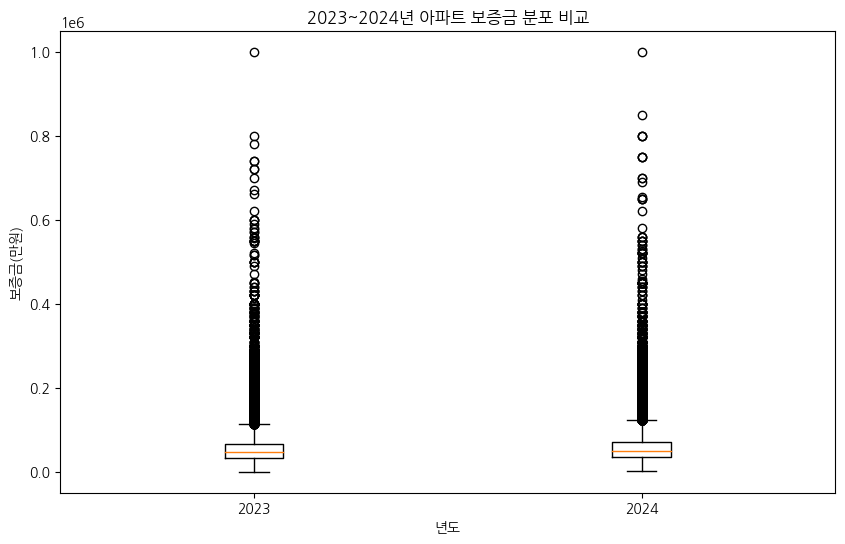

In [15]:
data = [
    apt23_df['보증금(만원)'],
    apt24_df['보증금(만원)']
]

plt.figure(figsize=(10,6))
plt.boxplot(data, labels=['2023', '2024']) 

plt.title('2023~2024년 아파트 보증금 분포 비교')
plt.ylabel('보증금(만원)')
plt.xlabel('년도')

plt.show()

- 23년 거래 건수: 165,859 건  /  평균 보증금 : 약 53,585만원 (약 5.36억)
- 24년 거래 건수: 143,869 건  /  평균 보증금 : 약 57,467만원 (약 5.7억) 

### 전용면적별 보증금

In [53]:
apt23_df.groupby('전용면적(㎡)')['보증금(만원)'].describe()

,count,mean,std,min,25%,50%,75%,max
전용면적(㎡),,,,,,,,
10.3215,1.0,12000.0,NaN,12000.0,12000.0,12000.0,12000.0,12000.0
10.7800,2.0,14850.0,212.132034,14700.0,14775.0,14850.0,14925.0,15000.0
10.9200,1.0,8190.0,NaN,8190.0,8190.0,8190.0,8190.0,8190.0
11.1900,1.0,14700.0,NaN,14700.0,14700.0,14700.0,14700.0,14700.0
11.3300,6.0,20250.0,2467.995138,16000.0,19225.0,21100.0,21925.0,22500.0
...,...,...,...,...,...,...,...,...
255.4000,1.0,210000.0,NaN,210000.0,210000.0,210000.0,210000.0,210000.0
257.8500,3.0,140000.0,17320.508076,120000.0,135000.0,150000.0,150000.0,150000.0
264.3000,1.0,207500.0,NaN,207500.0,207500.0,207500.0,207500.0,207500.0


In [55]:
apt24_df.groupby('전용면적(㎡)')['보증금(만원)'].describe()

,count,mean,std,min,25%,50%,75%,max
전용면적(㎡),,,,,,,,
10.7800,2.0,14700.0,0.000000,14700.0,14700.0,14700.0,14700.0,14700.0
10.9200,1.0,8500.0,NaN,8500.0,8500.0,8500.0,8500.0,8500.0
11.4800,5.0,16800.0,1604.680654,15000.0,16000.0,16000.0,18500.0,18500.0
11.4900,1.0,16000.0,NaN,16000.0,16000.0,16000.0,16000.0,16000.0
11.6657,2.0,11850.0,212.132034,11700.0,11775.0,11850.0,11925.0,12000.0
...,...,...,...,...,...,...,...,...
266.5200,1.0,205000.0,NaN,205000.0,205000.0,205000.0,205000.0,205000.0
267.0000,1.0,250000.0,NaN,250000.0,250000.0,250000.0,250000.0,250000.0
273.8600,1.0,240000.0,NaN,240000.0,240000.0,240000.0,240000.0,240000.0


### 거래금액

In [16]:
apt23_deal['거래금액(만원)'].describe()

count    3.565800e+04
mean     1.064337e+05
std      7.797207e+04
min      7.400000e+03
25%      6.000000e+04
50%      8.700000e+04
75%      1.295000e+05
max      1.800000e+06
Name: 거래금액(만원), dtype: float64

In [17]:
apt24_deal['거래금액(만원)'].describe()

count    5.740500e+04
mean     1.197823e+05
std      9.112348e+04
min      7.000000e+03
25%      6.600000e+04
50%      9.580000e+04
75%      1.440000e+05
max      2.500000e+06
Name: 거래금액(만원), dtype: float64

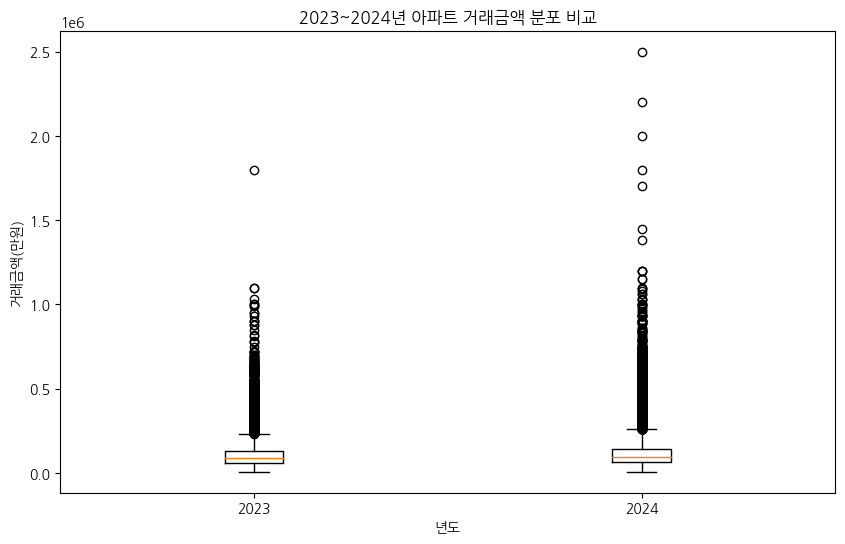

In [19]:
data = [
    apt23_deal['거래금액(만원)'],
    apt24_deal['거래금액(만원)']
]

plt.figure(figsize=(10,6))
plt.boxplot(data, labels=['2023','2024']) 

plt.title('2023~2024년 아파트 거래금액 분포 비교')
plt.ylabel('거래금액(만원)')
plt.xlabel('년도')

plt.show()

- 23년 거래 건수: 35,658건 /  평균 거래가 : 106,433만원 (약 10.6억)
- 24년 거래 건수: 57,405건 /  평균 거래가 : 119,782만원 (약 12억)

In [20]:
apt23_df.isnull().sum()

NO                   0
시군구                  0
번지                   0
본번                   0
부번                   0
단지명                  0
전월세구분                0
전용면적(㎡)              0
계약년월                 0
계약일                  0
보증금(만원)              0
월세금(만원)              0
층                    0
건축년도                 0
도로명                  0
계약기간                 0
계약구분                 0
갱신요구권 사용             0
종전계약 보증금(만원)    121062
종전계약 월세(만원)     121062
주택유형                 0
dtype: int64

In [21]:
apt23_df['종전계약 보증금(만원)'].value_counts()

50,000    1186
60,000    1073
70,000    1012
45,000     884
80,000     863
          ... 
41,265       1
9,765        1
15,300       1
23,807       1
14,180       1
Name: 종전계약 보증금(만원), Length: 1565, dtype: int64

In [22]:
apt23_df['보증금(만원)'].value_counts()

50000     5815
40000     5648
60000     4945
45000     4899
55000     4330
          ... 
9550         1
15140        1
33443        1
520000       1
73950        1
Name: 보증금(만원), Length: 4303, dtype: int64

### 23년, 24년 월별 전세 거래 건수 

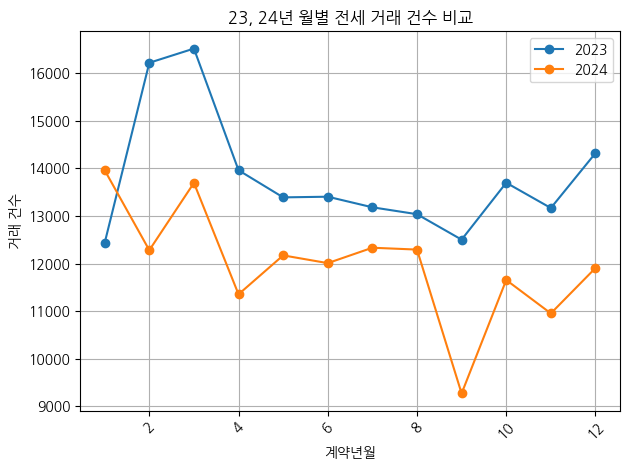

In [26]:
# 23, 24년 월별 거래 건수 계산
counts_23 = apt23_df['계약년월'].dt.month.value_counts().sort_index()
counts_24 = apt24_df['계약년월'].dt.month.value_counts().sort_index()


df_counts = pd.DataFrame({
    '2023': counts_23,
    '2024': counts_24
})

ax = df_counts.plot(marker='o')
ax.set_xlabel('계약년월')
ax.set_ylabel('거래 건수')
ax.set_title('23, 24년 월별 전세 거래 건수 비교')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

In [27]:
df_counts

,2023,2024
1,12435,13963
2,16225,12280
3,16524,13697
4,13963,11352
5,13392,12171
6,13406,12008
7,13183,12332
8,13038,12293
9,12502,9265
10,13700,11653


### 21, 22, 23년 월별 매매 거래 건수

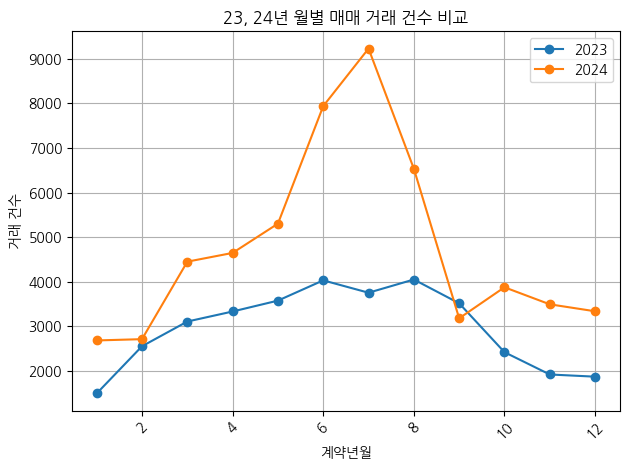

In [58]:
# 23년,24년 월별 거래 건수 계산
counts_23 = apt23_deal['계약년월'].dt.month.value_counts().sort_index()
counts_24 = apt24_deal['계약년월'].dt.month.value_counts().sort_index()

df_counts = pd.DataFrame({
    '2023': counts_23,
    '2024': counts_24
})

ax = df_counts.plot(marker='o')
ax.set_xlabel('계약년월')
ax.set_ylabel('거래 건수')
ax.set_title('23, 24년 월별 매매 거래 건수 비교')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

In [30]:
df_counts

,2023,2024
1,1498,2686
2,2556,2715
3,3110,4452
4,3335,4648
5,3579,5304
6,4033,7939
7,3756,9229
8,4052,6536
9,3519,3182
10,2423,3878


### 전세 거래 상위 지역

In [32]:
apt23_df['시군구'].value_counts().head(10)

서울특별시 노원구 상계동    5510
서울특별시 양천구 신정동    4222
서울특별시 강남구 개포동    3585
서울특별시 양천구 목동     2950
서울특별시 노원구 중계동    2847
서울특별시 송파구 잠실동    2679
서울특별시 서초구 반포동    2510
서울특별시 강동구 강일동    2478
서울특별시 관악구 봉천동    2468
서울특별시 강남구 대치동    2461
Name: 시군구, dtype: int64

Text(0.5, 1.0, '23년도 아파트 전세 거래 상위 지역')

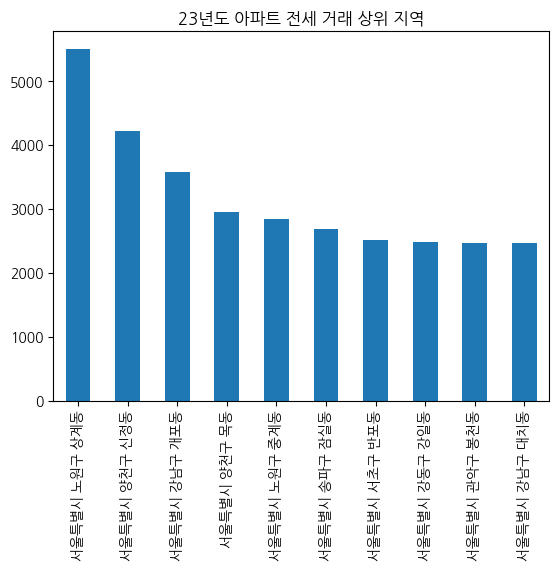

In [33]:
apt23_df['시군구'].value_counts().head(10).plot(kind='bar')
plt.title('23년도 아파트 전세 거래 상위 지역')

Text(0.5, 1.0, '22년도 아파트 전세 거래 상위 지역')

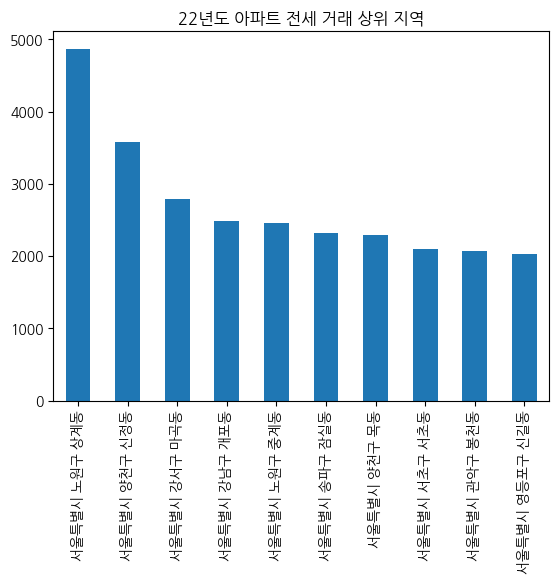

In [34]:
apt24_df['시군구'].value_counts().head(10).plot(kind='bar')
plt.title('22년도 아파트 전세 거래 상위 지역')